In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail_df = pd.read_csv("retail_sales_dataset.csv", encoding= 'unicode_escape')

In [3]:
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
retail_df.shape

(1000, 9)

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
retail_df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# Descriptive Statistics:

In [7]:
retail_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


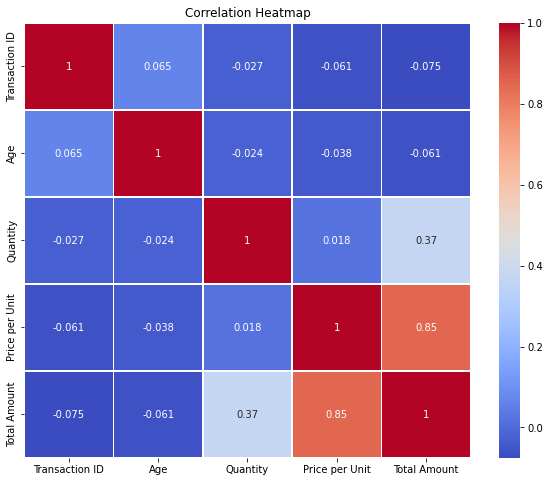

In [8]:
# Calculate correlation matrix
corr_matrix = retail_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Time Series Analysis:

In [9]:
## Convert Date to datetime format
retail_df['Date'] = pd.to_datetime(retail_df['Date'])

In [10]:
## Change column name 'Total Amount' to 'Sales'
retail_df = retail_df.rename(columns={'Total Amount':'Sales'})

In [11]:
## Extract year and month from 'Date'
retail_df['Year'] = retail_df['Date'].dt.year
retail_df['Month'] = retail_df['Date'].dt.month


In [12]:
## Group by Year and Month calculate total sales
monthly_sales = retail_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

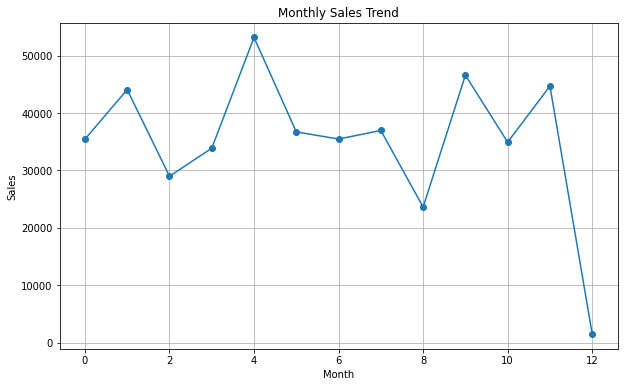

In [13]:
## Monthly sales trend
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

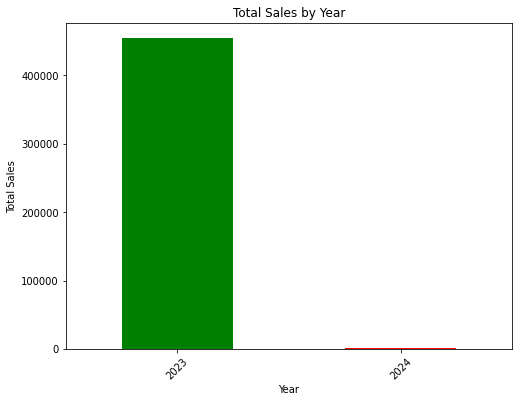

In [14]:
## Yearly Sales
sales_by_year = retail_df.groupby('Year')['Sales'].sum()
plt.figure(figsize=(8, 6))
sales_by_year.plot(kind='bar', color=['green','red'])
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Customer and Product Analysis:

<function matplotlib.pyplot.show(close=None, block=None)>

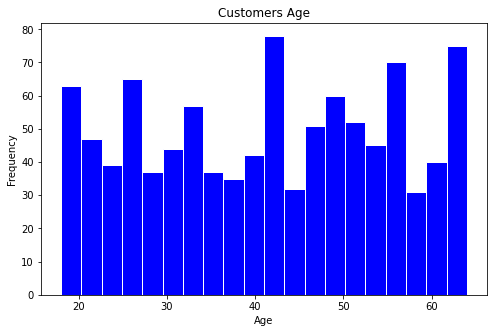

In [20]:
# Distribution of Customer Age
plt.figure(figsize=(8, 5))
plt.hist(retail_df['Age'],bins=20,color='blue', edgecolor = 'white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customers Age')
plt.show

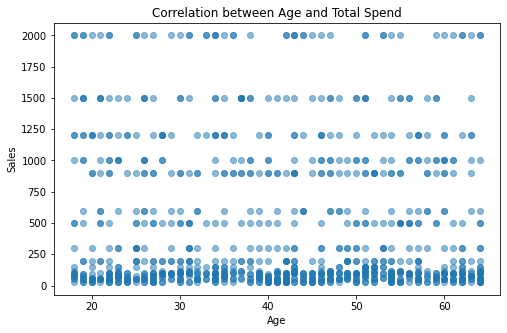

In [21]:
# Correlation between Age and Total Spend
plt.figure(figsize=(8,5))
plt.scatter(retail_df['Age'], retail_df['Sales'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Sales')
plt.title('Correlation between Age and Total Spend')
plt.show()

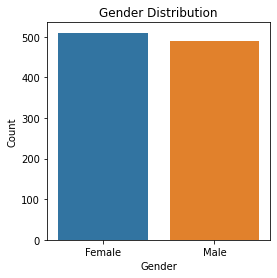

In [16]:
# Customer Demographics Analysis
# EX: Gender Distribution
gender_counts = retail_df['Gender'].value_counts()
plt.figure(figsize=(4, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

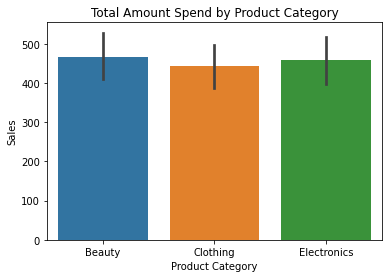

In [17]:
# Purchasing Behavior Analysis
# EX: Total Amount Spend by Product Category
plt.figure(figsize=(6, 4))
sns.barplot(x='Product Category', y='Sales', data=retail_df)
plt.title('Total Amount Spend by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

# Recommendations based on the EDA:

In [18]:
# 1) Increase marketing efforts during peak sales month and year.
# 2) Analyze customer demographics to target specific groups more effectively.
# 3) Adjust product offerings based pn popular items and nutritional value.